**Importando as bibliotecas**

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

**Carregamento da Base de Dados**

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/MaduAraujo/Challenge-Telecom-X-2/main/dados_limpos.csv')
df.head()

,ID_cliente,Evasao,Genero,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Servico_de_internet,...,Protecao_dipositivo,Suporte_tecnico,Streaming_TV,Streaming_filmes,Tipo_de_contrato,Fatura_online,Metodo_de_pagamento,Total_servico_dia,Total_servico_mes,Total_gasto
0,0002-ORFBO,Nao,Mulher,Nao,Sim,Sim,9,Sim,Nao,DSL,...,Nao,Sim,Sim,Nao,Anual,Sim,Cheque,2.19,65.6,593.30
1,0003-MKNFE,Nao,Homem,Nao,Nao,Nao,9,Sim,Sim,DSL,...,Nao,Nao,Nao,Sim,Mensal,Nao,Cheque,2.00,59.9,542.40
2,0004-TLHLJ,Sim,Homem,Nao,Nao,Nao,4,Sim,Nao,Fiber optic,...,Sim,Nao,Nao,Nao,Mensal,Sim,Cheque eletrônico,2.46,73.9,280.85
3,0011-IGKFF,Sim,Homem,Sim,Sim,Nao,13,Sim,Nao,Fiber optic,...,Sim,Nao,Sim,Sim,Mensal,Sim,Cheque eletrônico,3.27,98.0,1237.85
4,0013-EXCHZ,Sim,Mulher,Sim,Sim,Nao,3,Sim,Nao,Fiber optic,...,Nao,Sim,Sim,Nao,Mensal,Sim,Cheque,2.80,83.9,267.40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_cliente           7043 non-null   object 
 1   Evasao               7043 non-null   object 
 2   Genero               7043 non-null   object 
 3   Cidadao_Senior       7043 non-null   object 
 4   Parceiro             7043 non-null   object 
 5   Dependentes          7043 non-null   object 
 6   Tempo_de_contrato    7043 non-null   int64  
 7   Servico_de_telefone  7043 non-null   object 
 8   Linhas_multiplas     7043 non-null   object 
 9   Servico_de_internet  7043 non-null   object 
 10  Segurnaca_online     7043 non-null   object 
 11  Backup_online        7043 non-null   object 
 12  Protecao_dipositivo  7043 non-null   object 
 13  Suporte_tecnico      7043 non-null   object 
 14  Streaming_TV         7043 non-null   object 
 15  Streaming_filmes     7043 non-null   o

In [7]:
df.columns

Index(['ID_cliente', 'Evasao', 'Genero', 'Cidadao_Senior', 'Parceiro',
       'Dependentes', 'Tempo_de_contrato', 'Servico_de_telefone',
       'Linhas_multiplas', 'Servico_de_internet', 'Segurnaca_online',
       'Backup_online', 'Protecao_dipositivo', 'Suporte_tecnico',
       'Streaming_TV', 'Streaming_filmes', 'Tipo_de_contrato', 'Fatura_online',
       'Metodo_de_pagamento', 'Total_servico_dia', 'Total_servico_mes',
       'Total_gasto'],
      dtype='object')

**Construção dos gráficos**

Distribuição da variável Evasão

/tmp/ipython-input-393674138.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Evasao', palette = {'deepskyblue', 'red'})
/tmp/ipython-input-393674138.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'], fontsize = 12)


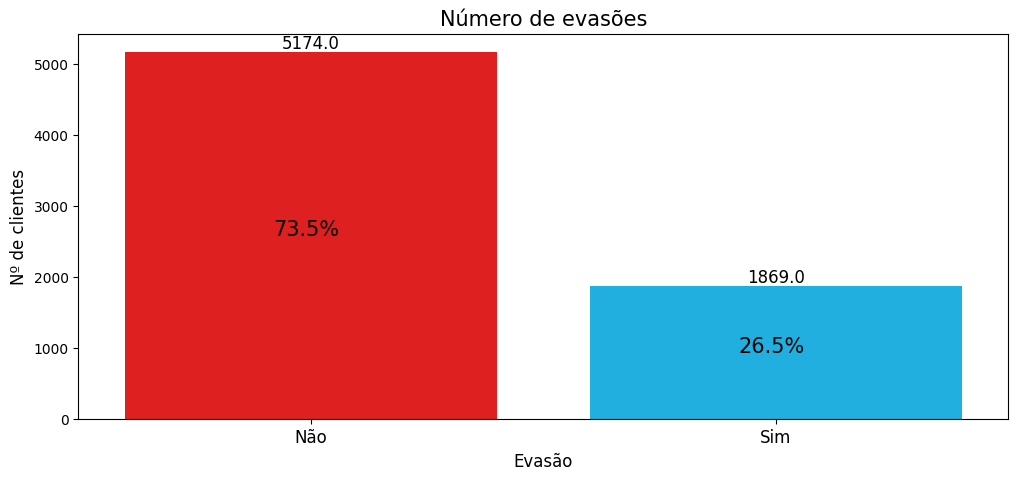

In [8]:
fig, ax = plt.subplots(figsize = (12,5))

ax = sns.countplot(data = df, x = 'Evasao', palette = {'deepskyblue', 'red'})

ax.set_title('Número de evasões', fontsize = 15)
ax.set_ylabel('Nº de clientes', fontsize = 12)
ax.set_xlabel('Evasão', fontsize = 12)
ax.set_xticklabels(['Não', 'Sim'], fontsize = 12)

# Adicionando rotúlo de dados do percentual do total
total_registros = len(df['Evasao'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_registros)
    x = p.get_x() + p.get_width()/2 - 0.08
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y),rotation=0, size = 15)

# Adicionando rotúlo de dados do Nº de clientes
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 50,
    '{:1}'.format((height)),
    ha='center',
    size = 12)

plt.show()

Evasão X Variáveis Categóricas

In [9]:
df.Metodo_de_pagamento.unique().tolist()

['Cheque',
 'Cheque eletrônico',
 'Cartão de crédito automático',
 'Transferência bancária automático']

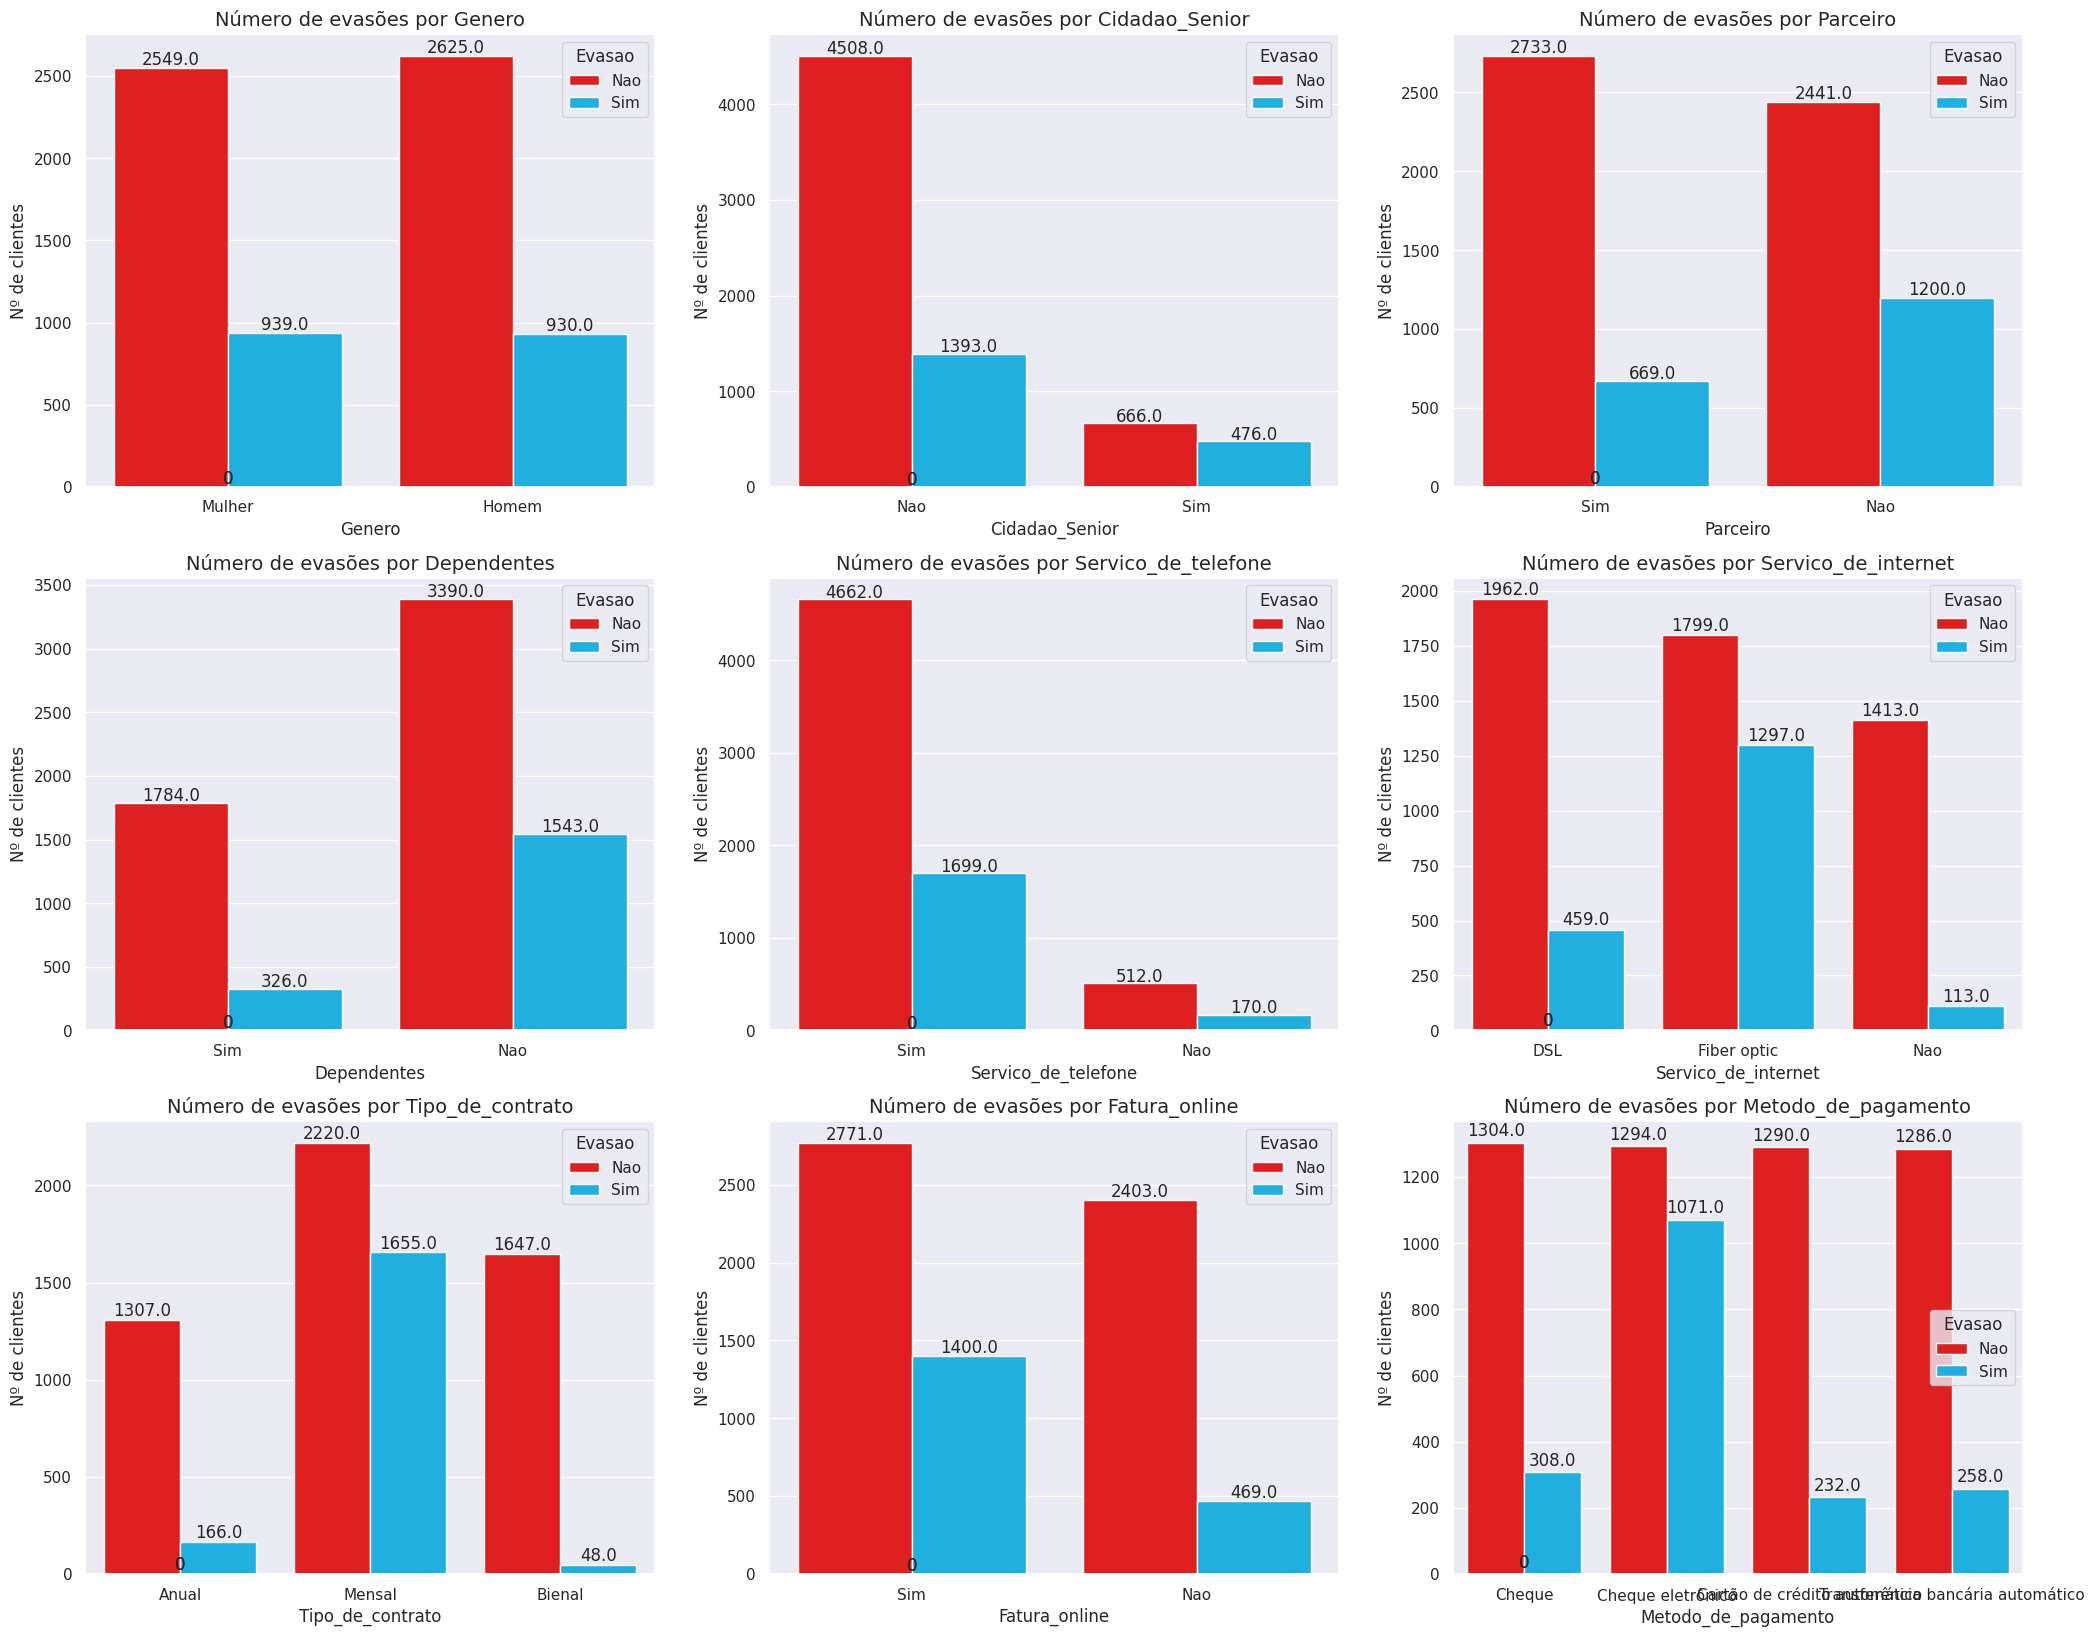

In [10]:
variaveis_categoricas = ['Genero', 'Cidadao_Senior', 'Parceiro',
       'Dependentes', 'Servico_de_telefone', 'Servico_de_internet', 'Tipo_de_contrato', 'Fatura_online',
       'Metodo_de_pagamento',]

lista_variaveis_categoricas = list(enumerate(variaveis_categoricas))

sns.set(rc = {'figure.figsize':(25,20)})

for i in lista_variaveis_categoricas:

    plt.subplot(3, 3,  i[0]+1)
    ax = sns.countplot(data = df,
                    x = i[1],
                    hue = 'Evasao',
                    palette = {'deepskyblue', 'red'},
                    )

    ax.set_title(f'Número de evasões por {i[1]}', fontsize = 14)
    ax.set_ylabel('Nº de clientes', fontsize = 12)
    ax.set_xlabel(i[1], fontsize = 12)

    # Adicionando rotúlo de dados do Nº de clientes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height + 20,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.show()

Evasão X Variáveis Númericas

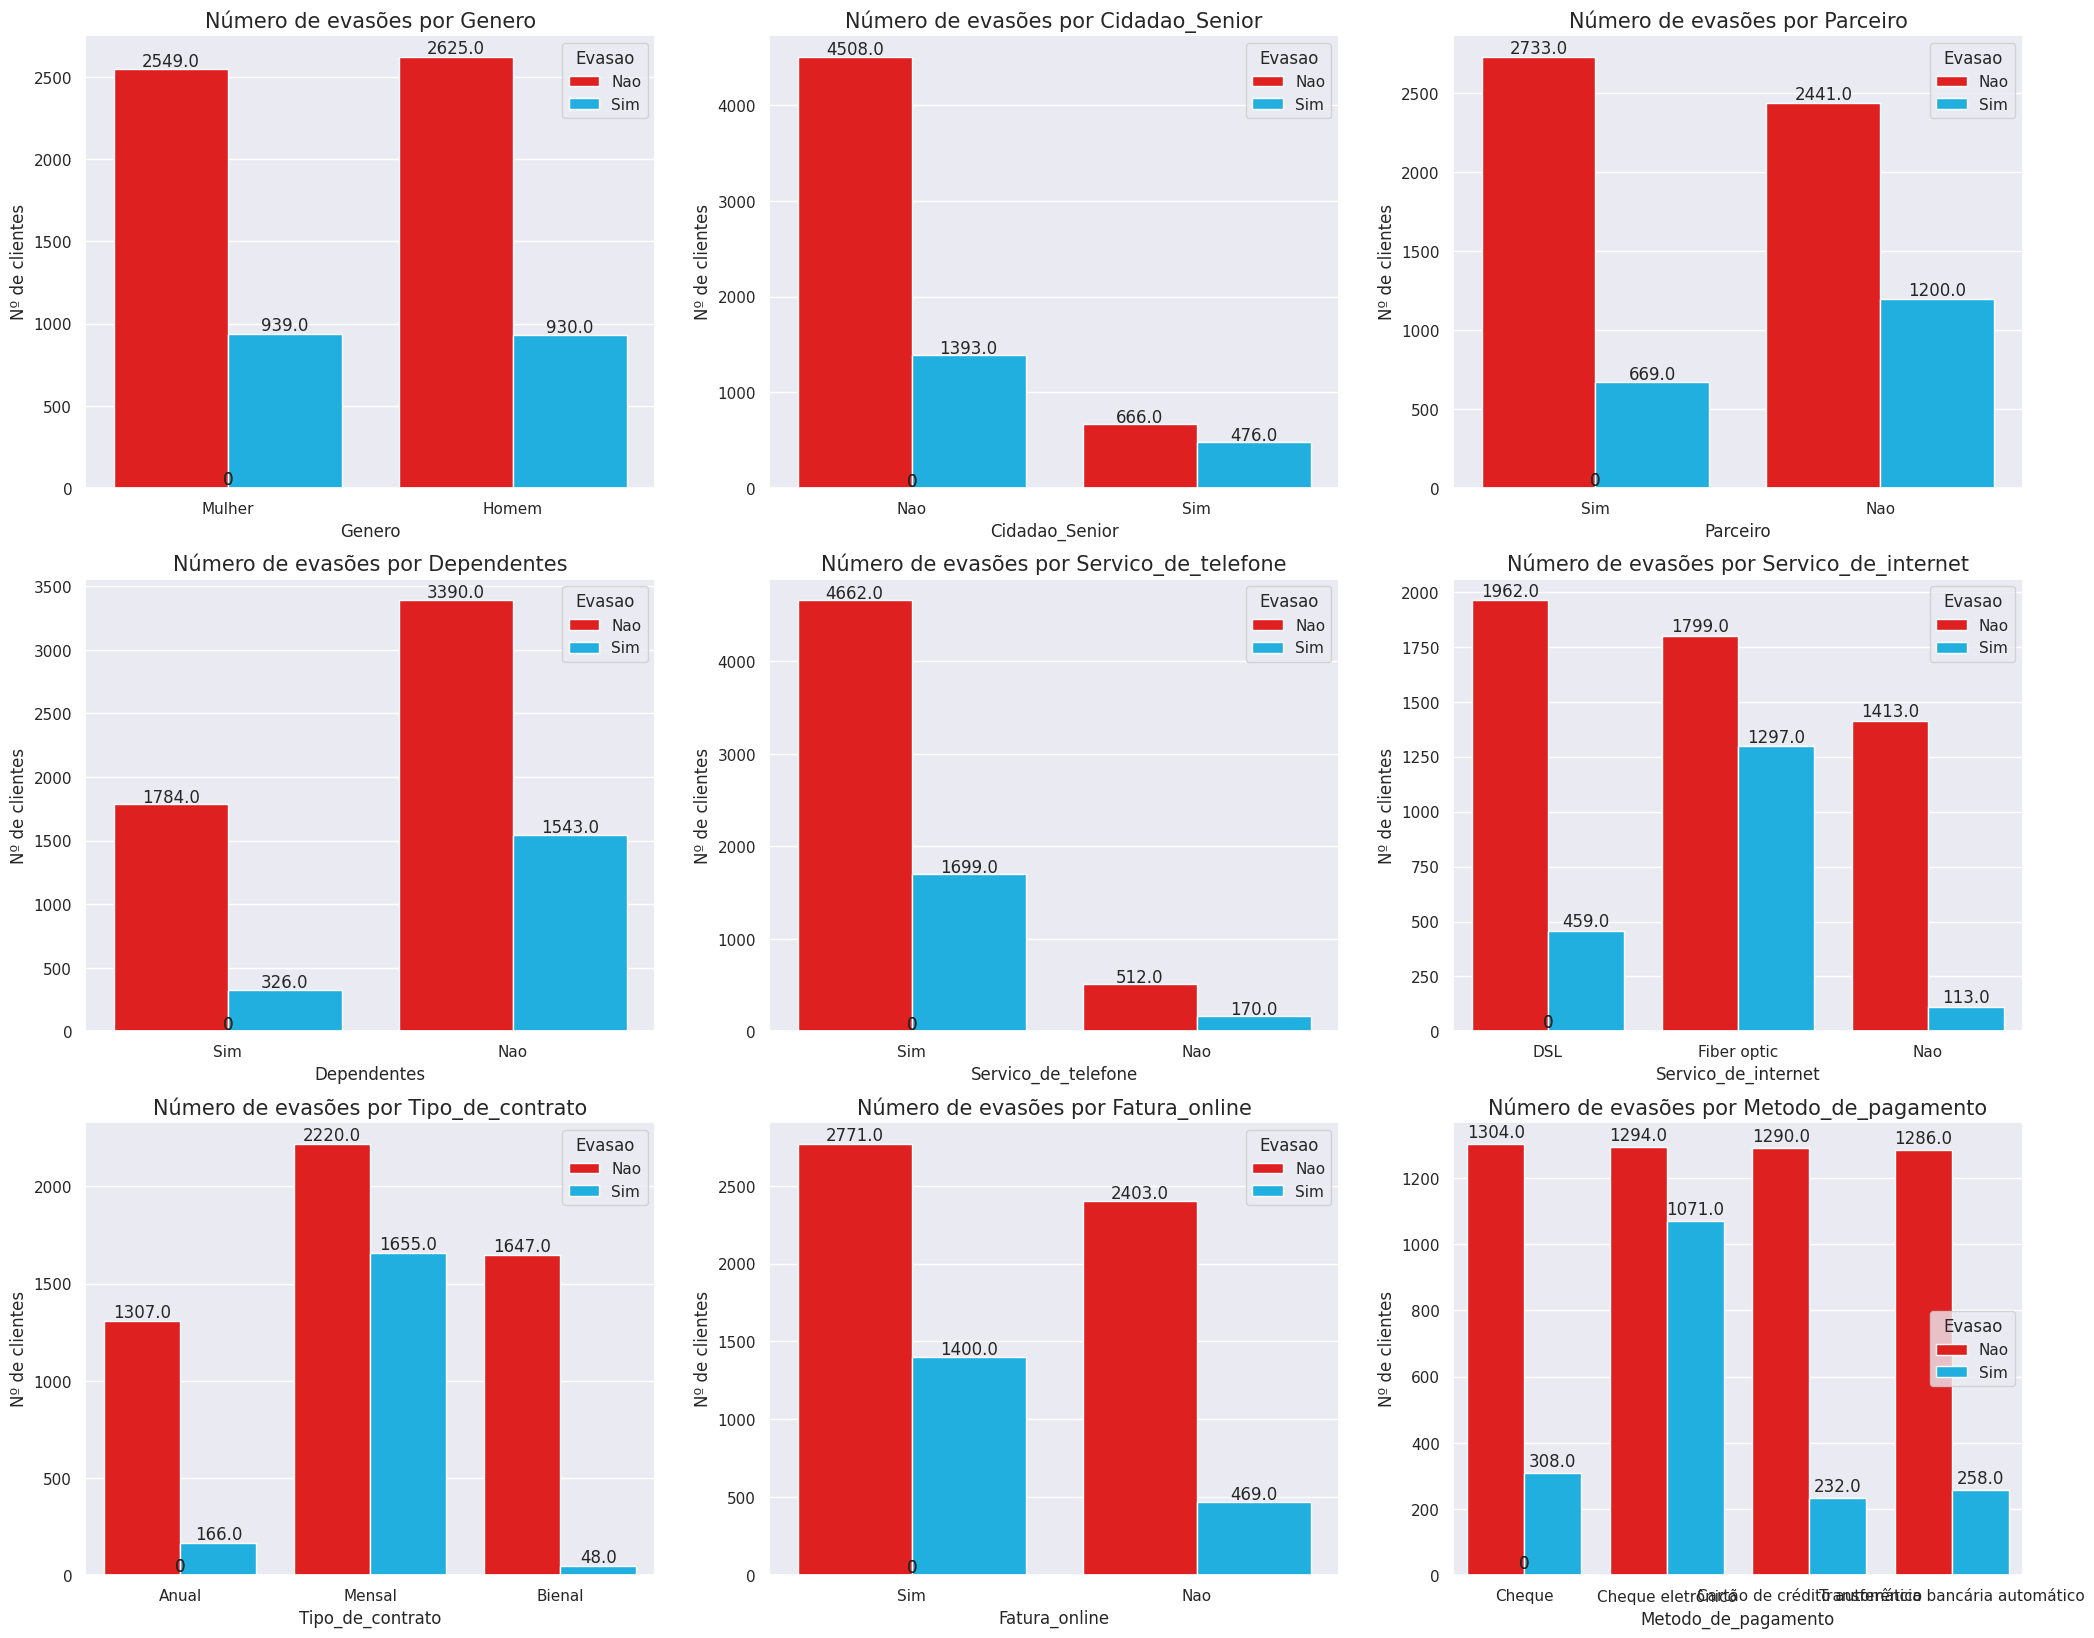

In [11]:
variaveis_categoricas = ['Genero', 'Cidadao_Senior', 'Parceiro',
       'Dependentes', 'Servico_de_telefone', 'Servico_de_internet', 'Tipo_de_contrato', 'Fatura_online',
       'Metodo_de_pagamento',]

lista_variaveis_categoricas = list(enumerate(variaveis_categoricas))

sns.set(rc = {'figure.figsize':(25,20)})

for i in lista_variaveis_categoricas:

    plt.subplot(3, 3,  i[0]+1)
    ax = sns.countplot(data = df,
                    x = i[1],
                    hue = 'Evasao',
                    palette = {'deepskyblue', 'red'},
                    )

    ax.set_title(f'Número de evasões por {i[1]}', fontsize = 15)
    ax.set_ylabel('Nº de clientes', fontsize = 12)
    ax.set_xlabel(i[1], fontsize = 12)

    # Adicionando rotúlo de dados do Nº de clientes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height + 20,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.show()

/tmp/ipython-input-846570194.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_1 = sns.boxplot(data = df,
/tmp/ipython-input-846570194.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_1 = sns.boxplot(data = df,
/tmp/ipython-input-846570194.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_1 = sns.boxplot(data = df,
/tmp/ipython-input-846570194.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_1 = sns.boxplot(data = 

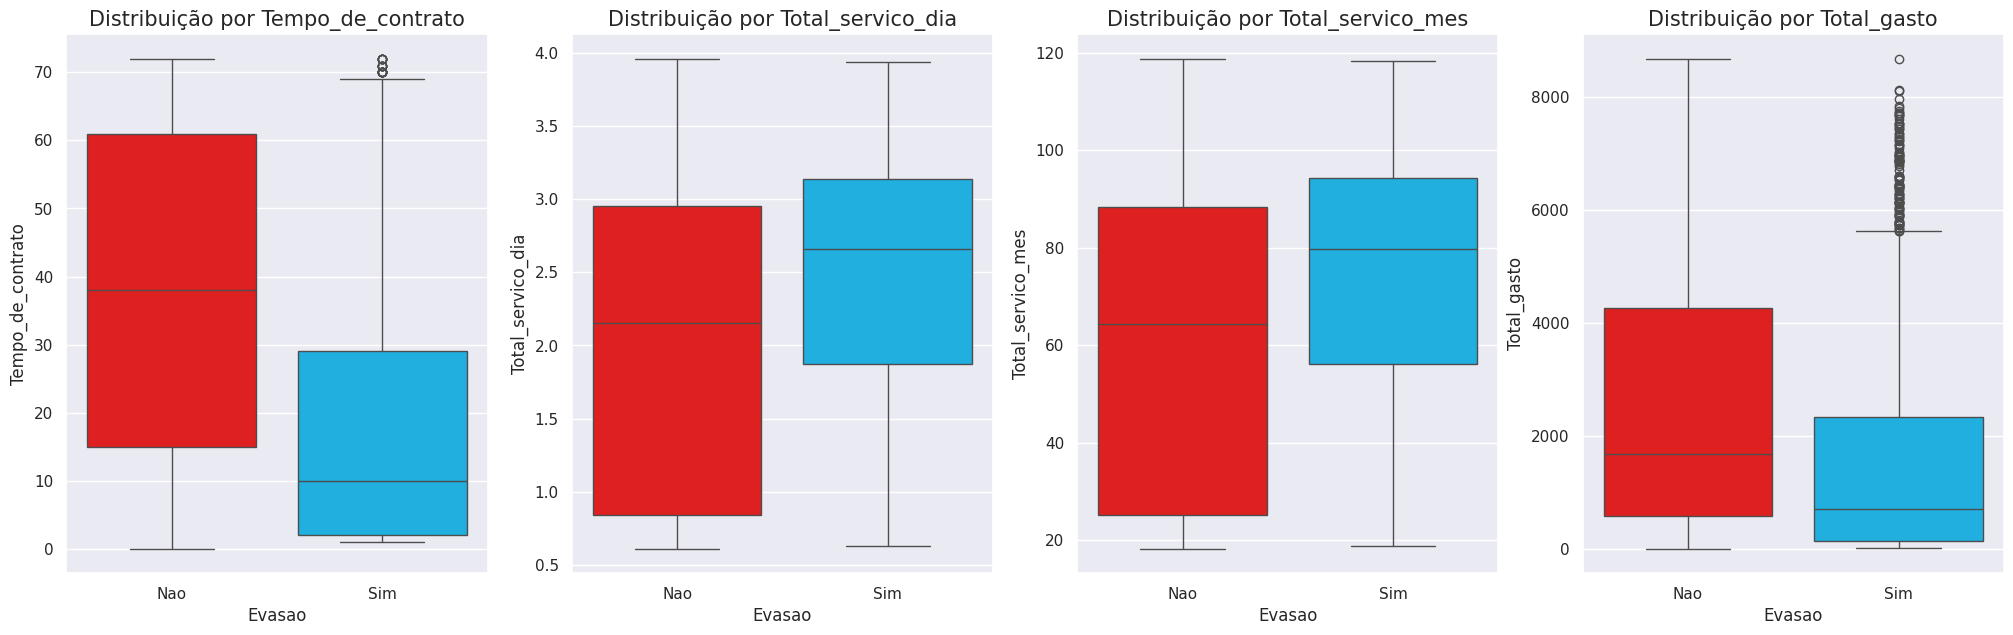

In [12]:
variaveis_numericas = ['Tempo_de_contrato', 'Total_servico_dia', 'Total_servico_mes',
       'Total_gasto']

lista_variaveis_numericas = list(enumerate(variaveis_numericas))

sns.set(rc = {'figure.figsize':(25,7)})

for i in lista_variaveis_numericas:

    plt.subplot(1, 4,  i[0]+1)
    ax_1 = sns.boxplot(data = df,
                    x = 'Evasao',
                    y = i[1],
                    palette = {'deepskyblue', 'red'},
                    )

    ax_1.set_title(f'Distribuição por {i[1]}', fontsize = 15)

plt.show()

In [13]:
df.groupby('Evasao')[['Total_servico_dia', 'Total_servico_mes']].mean()

,Total_servico_dia,Total_servico_mes
Evasao,,
Nao,2.04208,61.265124
Sim,2.48145,74.441332


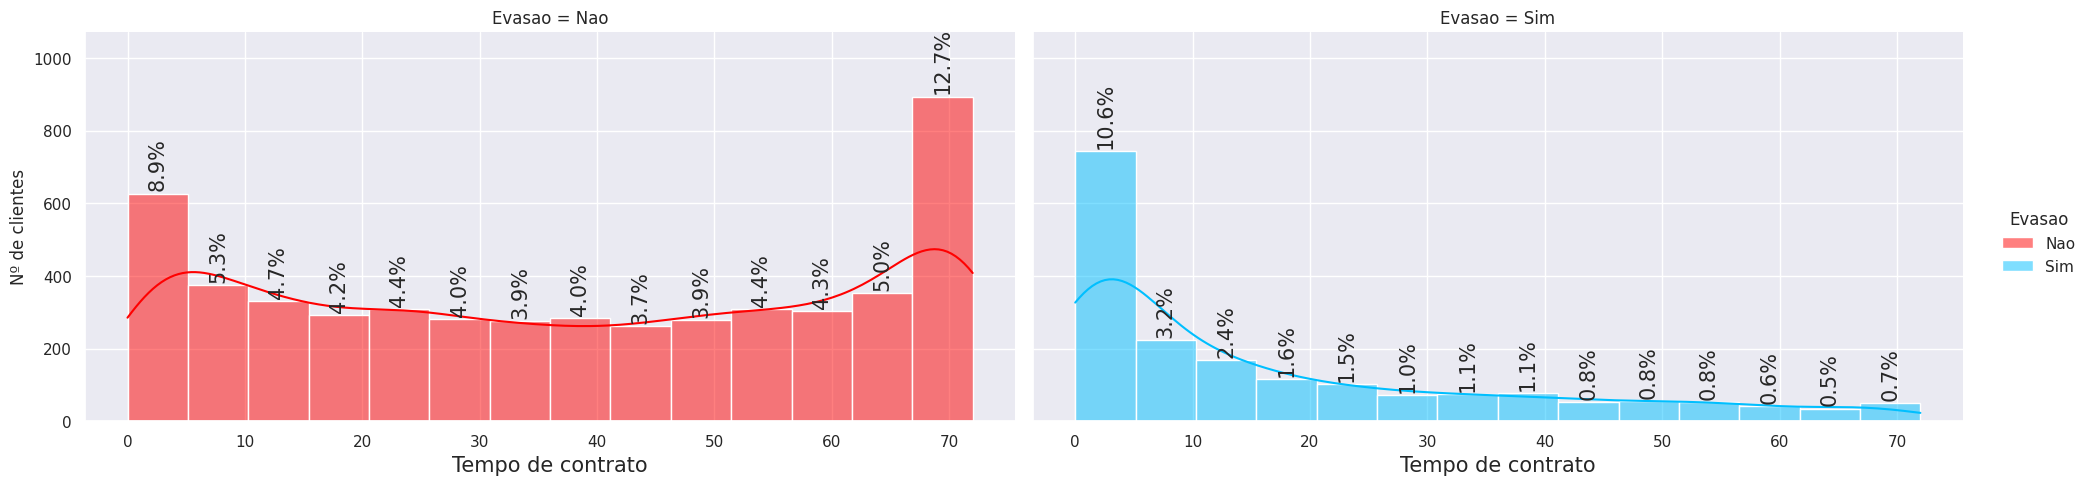

In [14]:
ax = sns.displot(data=df, binwidth=5, x='Tempo_de_contrato', col='Evasao', hue='Evasao', palette = {'Sim' : 'deepskyblue','Nao' : 'red'}, kde = True, aspect = 2)
ax.set_ylabels('Nº de clientes', fontsize = 12)
ax.set_xlabels('Tempo de contrato', fontsize = 12)

for ax in ax.axes.ravel():
    for c in ax.containers:
        labels = [f'{w:0.1f}%' if (w := v.get_height()/total_registros*100) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge', fontsize=15, rotation=90, padding=2)
        ax.set_xlabel("Tempo de contrato", fontsize = 15)

    ax.margins(y=0.2)

plt.show()

**Correlação das Variáveis**

In [15]:
!pip install dython

In [16]:
from dython import nominal

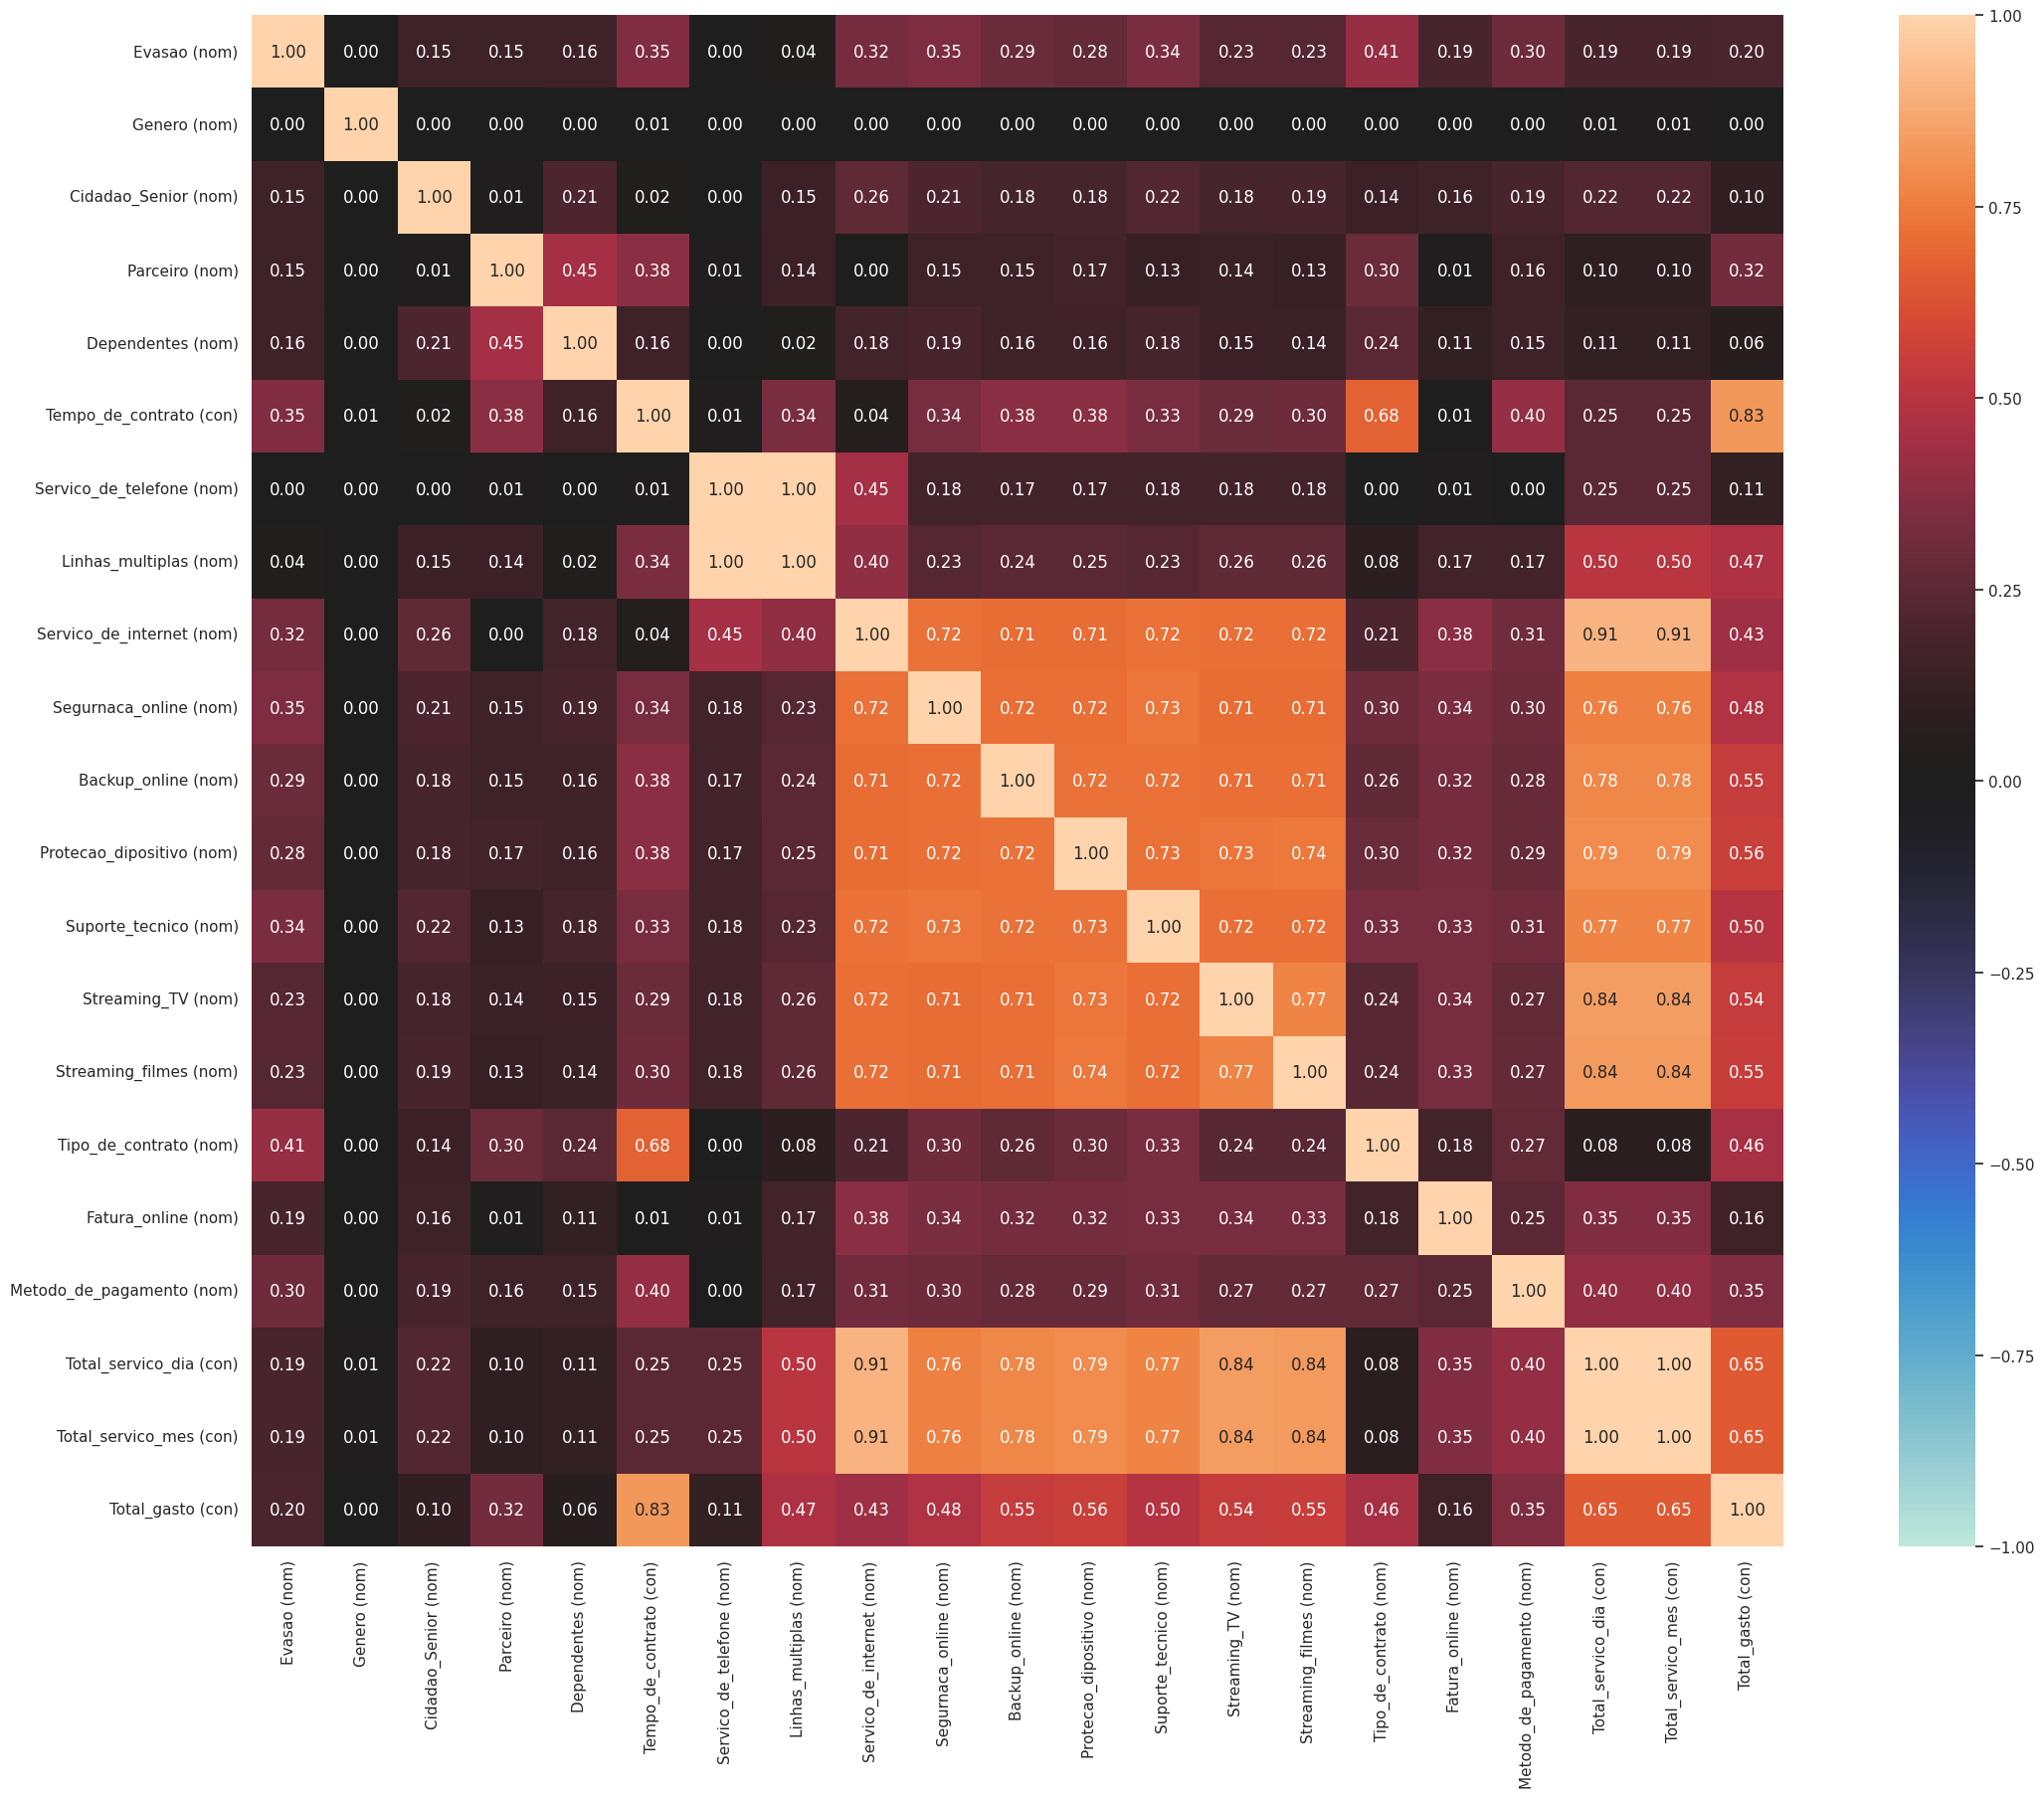

In [17]:
df_sem_id = df.iloc[:,1:]
nominal.associations(df_sem_id,figsize=(30,20),mark_columns=True);

**Explorando a biblioteca Plotly**

In [18]:
import plotly.express as px

In [19]:
px.histogram(df, x ='Evasao', title = 'Contagem de Evasões', template = 'simple_white', text_auto=True, color = 'Evasao',
                color_discrete_map={"Nao": "blue", "Sim": "red"},
                )

In [20]:
fig = px.pie(df, names='Evasao', title='Percentual de Evasões')
fig.show()

In [21]:
fig = px.box(df, y="Tempo_de_contrato", x = 'Evasao', color = 'Evasao')
fig.show()